# CarRacingV0 using a Convolutional Neural Network 

In [2]:
import sys
sys.path.append('C:\\Users\\yerld\\anaconda3\\envs\\tf-gpu\\lib\\site-packages')
sys.path.append('C:\\Users\\yerld\\anaconda3\\envs\\tf-gpu\\python38.zip')
sys.path

['C:\\MCT_S5_Deep_Learning\\labo02\\car_racing',
 'C:\\Users\\yerld\\anaconda3\\python39.zip',
 'C:\\Users\\yerld\\anaconda3\\DLLs',
 'C:\\Users\\yerld\\anaconda3\\lib',
 'C:\\Users\\yerld\\anaconda3',
 '',
 'C:\\Users\\yerld\\anaconda3\\lib\\site-packages',
 'C:\\Users\\yerld\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\yerld\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\yerld\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\yerld\\anaconda3\\envs\\tf-gpu\\lib\\site-packages',
 'C:\\Users\\yerld\\anaconda3\\envs\\tf-gpu\\python38.zip']

In [7]:
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage

# import Tensorflow namespaces
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

from PIL import Image

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

import pickle

from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# K.tensorflow_backend._get_available_gpus()

# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [2]:
# import training and test images
X_train = []
y_train = []
train_batch_size = 600

X_test = []
y_test = []
test_batch_size = int(train_batch_size / 5)

i_left = 0
i_right = 0
i_straight = 0

left_files = []
right_files = []
straight_files = []


for filename in os.listdir('dataset/left'):
    left_files.append(filename)

for filename in os.listdir('dataset/right'):
    right_files.append(filename)

for filename in os.listdir('dataset/straight'):
    straight_files.append(filename)


for i in range(train_batch_size + test_batch_size):
    if i < train_batch_size:
        if i < train_batch_size / 3:
            X_train.append(mpimg.imread(f"dataset/left/{left_files[random.randrange(0, len(left_files))]}"))
            y_train.append(0)
            i_left+=1
        elif i < (train_batch_size / 3) * 2:
            X_train.append(mpimg.imread(f"dataset/right/{right_files[random.randrange(0, len(right_files))]}"))
            y_train.append(1)
            i_right+=1
        else:
            X_train.append(mpimg.imread(f"dataset/straight/{straight_files[random.randrange(0, len(straight_files))]}"))
            y_train.append(2)
            i_straight+=1
    else:
        if i < train_batch_size + (test_batch_size / 3):
            X_test.append(mpimg.imread(f"dataset/left/{left_files[random.randrange(0, len(left_files))]}"))
            y_test.append(0)
            i_left+=1
        if i < train_batch_size + ((test_batch_size / 3) * 2):
            X_test.append(mpimg.imread(f"dataset/right/{right_files[random.randrange(0, len(right_files))]}"))
            y_test.append(1)
            i_right+=1
        else:
            X_test.append(mpimg.imread(f"dataset/straight/{straight_files[random.randrange(0, len(straight_files))]}"))
            y_test.append(2)
            i_straight+=1


X_train[:] = [x / 255 for x in X_train]
X_test[:] = [x / 255 for x in X_test]

NameError: name 'os' is not defined

c:\users\yerld\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

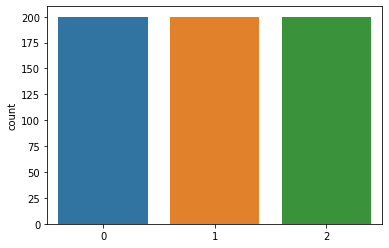

In [4]:
sns.countplot(y_train)

In [5]:
# reshape all images to 64x64
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

for i in range(train_batch_size):
    X_train[i] = np.resize(X_train[i], [85,96,3])
    
for i in range(test_batch_size):
    X_test[i] = np.resize(X_test[i], [85,96,3])
    
# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

[1. 0. 0.]


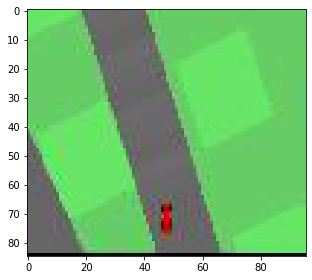

In [6]:
#training images
print(y_train[0])
imshow(X_train[0])

160


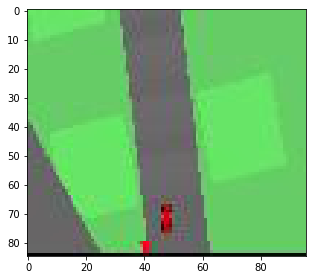

In [7]:
#test images
print(len(X_test))
imshow(X_test[0])

In [8]:
# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 64 #
epochs = 110 #
dropout_rate = 0.4
neurons_per_layer = 10
num_hidden_layers = 2

adam = tf.keras.optimizers.Adam(lr = 0.0001)
rmsprop = tf.keras.optimizers.RMSprop(lr = 0.001)
#-----------------------------------------------
#-----------------------------------------------
num_classes = 3
img_rows, img_cols = 85, 96
input_shape = (img_rows, img_cols,3)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape))
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
model.add(Activation('relu'))
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3)))
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
model.add(Activation('relu'))
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten())

for i in range(num_hidden_layers):
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate)) # Value between 0 and 1
    model.add(Dense(neurons_per_layer, activation='relu')) # meer layers met minder neuronen, dropout lager
    
model.add(BatchNormalization())
model.add(Dropout(dropout_rate)) # Value between 0 and 1
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Trainen van het CNN
history = model.fit(X_train, y_train,batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/110
8/8 [==============================] - 3s 391ms/step - loss: 1.8090 - accuracy: 0.3917 - val_loss: 0.7590 - val_accuracy: 1.0000
Epoch 2/110
8/8 [==============================] - 3s 360ms/step - loss: 1.4876 - accuracy: 0.4375 - val_loss: 1.1578 - val_accuracy: 0.0000e+00
Epoch 3/110
8/8 [==============================] - 3s 362ms/step - loss: 1.1484 - accuracy: 0.5250 - val_loss: 1.3517 - val_accuracy: 0.0000e+00
Epoch 4/110
8/8 [==============================] - 3s 381ms/step - loss: 1.1652 - accuracy: 0.5292 - val_loss: 1.4595 - val_accuracy: 0.0000e+00
Epoch 5/110
8/8 [==============================] - 3s 373ms/step - loss: 1.0569 - accuracy: 0.5667 - val_loss: 1.5241 - val_accuracy: 0.0000e+00
Epoch 6/110
8/8 [==============================] - 3s 384ms/step - loss: 1.0454 - accuracy: 0.6062 - val_loss: 1.5754 - val_accuracy: 0.0000e+00
Epoch 7/110
8/8 [==============================] - 3s 372ms/step - loss: 0.9466 - accuracy: 0.6125 - val_loss: 1.6404 - val_accuracy: 

Epoch 58/110
8/8 [==============================] - 3s 379ms/step - loss: 0.5213 - accuracy: 0.8208 - val_loss: 0.7801 - val_accuracy: 0.6667
Epoch 59/110
8/8 [==============================] - 3s 364ms/step - loss: 0.5188 - accuracy: 0.8125 - val_loss: 0.7414 - val_accuracy: 0.6750
Epoch 60/110
8/8 [==============================] - 3s 384ms/step - loss: 0.5615 - accuracy: 0.8021 - val_loss: 0.7233 - val_accuracy: 0.6833
Epoch 61/110
8/8 [==============================] - 3s 374ms/step - loss: 0.5469 - accuracy: 0.7792 - val_loss: 0.6977 - val_accuracy: 0.6917
Epoch 62/110
8/8 [==============================] - 3s 374ms/step - loss: 0.5284 - accuracy: 0.8000 - val_loss: 0.6942 - val_accuracy: 0.6917
Epoch 63/110
8/8 [==============================] - 3s 368ms/step - loss: 0.4951 - accuracy: 0.8333 - val_loss: 0.7136 - val_accuracy: 0.6750
Epoch 64/110
8/8 [==============================] - 3s 369ms/step - loss: 0.5063 - accuracy: 0.8333 - val_loss: 0.7202 - val_accuracy: 0.6750
Epoch 

In [ ]:
model.save(".models/model01", True)

In [9]:
# Plot of the training history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [10]:
# Evaluation on the test set 

rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(rounded_labels, y_pred))

cf = confusion_matrix(rounded_labels, y_pred)

print(cf)
print(accuracy_score(rounded_labels, y_pred) * 100)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


              precision    recall  f1-score   support

           0       0.86      0.95      0.90        40
           1       0.92      0.97      0.95        80
           2       0.87      0.68      0.76        40

    accuracy                           0.89       160
   macro avg       0.88      0.87      0.87       160
weighted avg       0.89      0.89      0.89       160

[[38  0  2]
 [ 0 78  2]
 [ 6  7 27]]
89.375


In [11]:
print(model.predict(X_test[60:61]))
print(y_test[60])

[[0.8805259  0.09407363 0.02540048]]
[1. 0. 0.]


In [3]:
from __future__ import print_function

import argparse
from pyglet.window import key
import gym
import numpy as np
import pickle
import os
from datetime import datetime
import gzip
import json
from PIL import Image
import time
import copy



if __name__ == "__main__":
        
    env = gym.make('CarRacing-v0').unwrapped
    env.reset()

    action = np.zeros(4, dtype=np.float32)
    
    episode_rewards = []
    good_steps = episode_steps = 0
    # Episode loop
    # skip first 60 frames
    frame = 0
    accellerate = 30
    
    while True:
        state = env.reset()
        state = state[:85,:]
        state = state / 255
        state = [state]
        state = np.array(state)
        
        restart = False
        episode_steps = good_steps
        # State loop
        while True:

            action[0] = np.argmax(model.predict(state))
            action[0] = action[0] - 1
            print(f'action: {action}')
            next_state, r, done, info = env.step(action)

            if frame>60:
                if (accellerate >0):
                    action[1]=1
                    accellerate -= 1
                else: action[1]=0

            state = next_state
            state = state[:85,:]
            state = state / 255
            state = [state]
            state = np.array(state)
            frame +=1
            episode_steps += 1

            env.render()
            if done or restart:
                break



    env.close()

Track generation: 1203..1508 -> 305-tiles track


C:\Users\yerld\anaconda3\envs\tf-gpu2\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


Track generation: 1076..1349 -> 273-tiles track
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [-1.  0.  0.  0.]
action: [-1.  0.  0.  0.]
action: [-1.  0.  0.  0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [-1.  0.  0.  0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [1. 0. 0. 0.]
action: [1. 0. 0. 0.]
action: [1. 0. 0. 0.]
action: [1. 0. 0. 0.]
action: [1. 0. 0. 0.]
action: [1. 0. 0. 0.]
action: [1. 0. 0. 0.]
action: [1. 0. 0. 0.]
action: [1. 0. 0. 0.]
action: [1. 0. 0. 0.]
action: [1. 0. 0. 0.]
action: [1. 

action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0

action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]
action: [0. 0. 0. 0.]


KeyboardInterrupt: 

In [4]:
env.close()